## In house Calculations of Eastern Bering Sea Ice Extent in the manner of the SeaIce V3 product below.

### Define boundaries and cycle through all Bootstrap/NRT data

BS - 178E to Alaska (for EBS), 65.666N - all available points south.

We want to compare to the Daily Bering Sea ice extent during the past fourty years (data from the NSIDC Regional Sea Ice Index) which does a more comprehensive job of masking out the basin then the simple box, but we are only interested in the ice over the EBS shelf.  A 5day trailing average is applied to the regional extent product.

### SeaIce Extent V3 - Daily Updated

__pyversion__==3.7   
__author__==S.Bell

__general info__ https://nsidc.org/data/g02135   
__datasource__ ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/N_Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx

See https://blogs.helmholtz.de/polarpredictionmatters/2018/07/polar-forecasts-against-impacts-of-declining-bering-sea-ice-on-alaska-coastal-communities-part-1/ for reference.

Sources and Citations (see data)
- Daily Bering Sea ice extent during the past fourty years (data from the NSIDC Regional Sea Ice Index)

- Fetterer, F., K. Knowles, W. Meier, M. Savoie, and A. K. Windnagel. 2017, updated daily. Sea Ice Index, Version 3. [Indicate subset used]. Boulder, Colorado USA. NSIDC: National Snow and Ice Data Center. doi: https://doi.org/10.7265/N5K072F8. [Date Accessed].

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker



In [3]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [4]:
fid = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/N_Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx'
page = 'Bering-Extent-km^2' #Bering-Area-km^2
#fid = '/Users/bell/in_and_outbox/Ongoing_Analysis/SeaIce_Analysis/BeringSea_IceExtent/Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0 EBS edit.xlsx'
#page = 'EBering-Extent-km^2' #Bering-Area-km^2

In [5]:
dfe = pd.read_excel(fid,sheet_name=page)

In [6]:
dfe = dfe.interpolate()
dfe['doy_y2'] = dfe.index+365

#make missing days after present day
dfe[2021][dfe[2021].index > int(datetime.datetime.strftime(datetime.datetime.now(),'%j'))] = np.nan

<ipython-input-6-15b3594a2d78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe[2021][dfe[2021].index > int(datetime.datetime.strftime(datetime.datetime.now(),'%j'))] = np.nan


In [7]:
dfmean = dfe.copy()
dfmean.drop(columns=[2018,2017,2016,2015],inplace=True)
dfmean['avg'] = dfmean.drop(59,axis=0).drop(['month','day'], axis=1).mean(axis=1)
#previous line has lots of columns that don't need to be part of the mean
## unnamed (second doy) brings value down alot, but it also had the daily averages in it
# so that should have brought it back up

drop_cols = ['month',        'day', 'Unnamed: 2',      '1978d',      '1979d',
            '1980d',      '1981d',      '1982d',      '1983d',      '1984d',
            '1985d',      '1986d',      '1987d',      '1988d',      '1989d',
            '1990d',      '1991d',      '1992d',      '1993d',      '1994d',
            '1995d',      '1996d',      '1997d',      '1998d',      '1999d',
            '2000d',      '2001d',      '2002d',      '2003d',      '2004d',
            '2005d',      '2006d',      '2007d',      '2008d',      '2009d',
            '2010d',      '2011d',      '2012d',      '2013d',      '2014d',
            '2015d',      '2016d',      '2017d',      '2018d',      '2019d',
            '2020d',  '5dayAve->','doy_y2']
dfmean['avg'] = dfmean.drop(59,axis=0).drop(drop_cols, axis=1).mean(axis=1)

#make missing days select day
#dfe[2020][dfe[2020].index > int(datetime.datetime.strftime(datetime.datetime(2020,5,17),'%j'))] = np.nan

KeyError: "['Unnamed: 2' '1978d' '1979d' '1980d' '1981d' '1982d' '1983d' '1984d'\n '1985d' '1986d' '1987d' '1988d' '1989d' '1990d' '1991d' '1992d' '1993d'\n '1994d' '1995d' '1996d' '1997d' '1998d' '1999d' '2000d' '2001d' '2002d'\n '2003d' '2004d' '2005d' '2006d' '2007d' '2008d' '2009d' '2010d' '2011d'\n '2012d' '2013d' '2014d' '2015d' '2016d' '2017d' '2018d' '2019d' '2020d'\n '5dayAve->'] not found in axis"

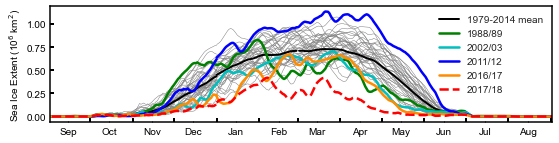

In [8]:
# start at Sep 1 (244)
# Area Extent in x10^6 km^2

fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for yy in range(1978,2018,1):
    plt.plot(dfe.index,dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    plt.plot(dfe['doy_y2'],dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    
#Fall
l1 = ax1.plot(dfmean.index,dfmean['avg']/1e6,'k',linewidth=2,label='1979-2014 mean')
l2 = ax1.plot(dfe.index,dfe[1988]/1e6,'g',linewidth=2.5,label='1988/89')
l3 = ax1.plot(dfe.index,dfe[2002]/1e6,'c-',linewidth=2.5,label='2002/03')
l4 = ax1.plot(dfe.index,dfe[2011]/1e6,'b-',linewidth=2.5,label='2011/12')
l5 = ax1.plot(dfe.index,dfe[2016]/1e6,'darkorange',linewidth=2.5,label='2016/17')
l6 = ax1.plot(dfe.index,dfe[2017]/1e6,'r--',linewidth=2.5,label='2017/18')
#l7 = ax1.plot(dfe.index,dfe[2018]/1e6,'y-',linewidth=2.5,label='2018/19')
#Spring
plt.plot(dfmean['doy_y2'],dfmean['avg']/1e6,'k',linewidth=2,label='')
plt.plot(dfe['doy_y2'],dfe[1989]/1e6,'g',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2003]/1e6,'c-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2012]/1e6,'b-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2017]/1e6,'darkorange',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2018]/1e6,'r--',linewidth=2.5,label='')
#plt.plot(dfe['doy_y2'],dfe[2019]/1e6,'y-',linewidth=2.5,label='')

plt.legend()
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336,
               0+365,31+365,61+365,92+365,122+365,153+365,
               183+365,214+365,245+365,275+365,306+365,336+365),)
ax1.set_xlim([244,244+365])
#plt.yticks(np.arange(0,1.2,.4))
ax1.tick_params(axis='y',which='both',bottom='on')

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax1.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(DateFormatter('%b'))
ax1.xaxis.set_major_formatter(DateFormatter(''))
ax1.xaxis.set_tick_params(which='major', pad=15)
ax1.xaxis.set_tick_params(which='minor', pad=5)

plt.ylabel('Sea Ice Extent (10$^{6}$ km$^{2}$)')
fig.savefig('images/EBS_fig1.png',dpi=300)
fig.savefig('images/EBS_fig1.svg',dpi=300)

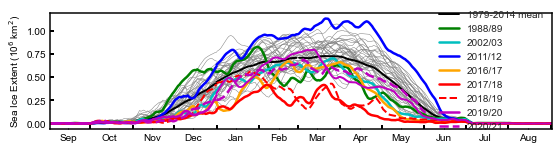

In [9]:
# start at Sep 1 (244)
# Area Extent in x10^6 km^2

fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for yy in range(1978,2018,1):
    plt.plot(dfe.index,dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    plt.plot(dfe['doy_y2'],dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    
#Fall
l1 = ax1.plot(dfmean.index,dfmean['avg']/1e6,'k',linewidth=2,label='1979-2014 mean')
l2 = ax1.plot(dfe.index,dfe[1988]/1e6,'g',linewidth=2.5,label='1988/89')
l4 = ax1.plot(dfe.index,dfe[2002]/1e6,'c-',linewidth=2.5,label='2002/03')
l5 = ax1.plot(dfe.index,dfe[2011]/1e6,'b-',linewidth=2.5,label='2011/12')
l6 = ax1.plot(dfe.index,dfe[2016]/1e6,'orange',linewidth=2.5,label='2016/17')
l7 = ax1.plot(dfe.index,dfe[2017]/1e6,'r-',linewidth=2.5,label='2017/18')
l8 = ax1.plot(dfe.index,dfe[2018]/1e6,'r--',linewidth=2.,label='2018/19')
l9 = ax1.plot(dfe.index,dfe[2019]/1e6,'m-',linewidth=2.5,label='2019/20')
l9 = ax1.plot(dfe.index,dfe[2020]/1e6,'m--',linewidth=2.5,label='2020/21')
#Spring
plt.plot(dfmean['doy_y2'],dfmean['avg']/1e6,'k',linewidth=2,label='')
plt.plot(dfe['doy_y2'],dfe[1989]/1e6,'g',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2003]/1e6,'c-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2012]/1e6,'b-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2017]/1e6,'orange',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2018]/1e6,'r-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2019]/1e6,'r--',linewidth=2.,label='')
plt.plot(dfe['doy_y2'],dfe[2020]/1e6,'m-',linewidth=2.,label='')
plt.plot(dfe['doy_y2'],dfe[2021]/1e6,'m--',linewidth=2.5,label='')

plt.legend(loc='right')
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336,
               0+365,31+365,61+365,92+365,122+365,153+365,
               183+365,214+365,245+365,275+365,306+365,336+365),)
ax1.set_xlim([244,244+365])
#plt.yticks(np.arange(0,1.2,.4))
ax1.tick_params(axis='y',which='both',bottom='on')

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax1.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(DateFormatter('%b'))
ax1.xaxis.set_major_formatter(DateFormatter(''))
ax1.xaxis.set_tick_params(which='major', pad=15)
ax1.xaxis.set_tick_params(which='minor', pad=5)
    
plt.ylabel('Sea Ice Extent (10$^{6}$ km$^{2}$)')
fig.savefig('images/EBS_fig2.png',dpi=300)
fig.savefig('images/EBS_fig2.svg',dpi=300)

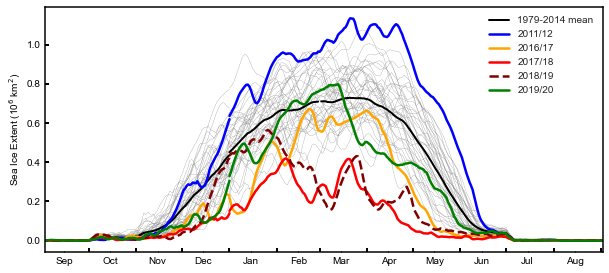

In [10]:

fig = plt.figure(1,figsize=(10,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for yy in range(1978,2018,1):
    plt.plot(dfe.index,dfe[yy]/1e6,c='gray',linewidth=.25,label='')
    plt.plot(dfe['doy_y2'],dfe[yy]/1e6,c='gray',linewidth=.25,label='')
    
#Fall
l1 = ax1.plot(dfmean.index,dfmean['avg']/1e6,'k',linewidth=2,label='1979-2014 mean')
l5 = ax1.plot(dfe.index,dfe[2011]/1e6,'b-',linewidth=2.5,label='2011/12')
l6 = ax1.plot(dfe.index,dfe[2016]/1e6,'orange',linewidth=2.5,label='2016/17')
l7 = ax1.plot(dfe.index,dfe[2017]/1e6,'r-',linewidth=2.5,label='2017/18')
l8 = ax1.plot(dfe.index,dfe[2018]/1e6,'maroon',linestyle='--',linewidth=2.5,label='2018/19')
l8 = ax1.plot(dfe.index,dfe[2019]/1e6,'g-',linewidth=2.5,label='2019/20')
#Spring
plt.plot(dfmean['doy_y2'],dfmean['avg']/1e6,'k',linewidth=2,label='')
plt.plot(dfe['doy_y2'],dfe[2012]/1e6,'b-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2017]/1e6,'orange',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2018]/1e6,'r-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2019]/1e6,'maroon',linestyle='--',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2020]/1e6,'g-',linewidth=2.5,label='')

plt.legend(loc='best')
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336,
               0+365,31+365,61+365,92+365,122+365,153+365,
               183+365,214+365,245+365,275+365,306+365,336+365),)
ax1.set_xlim([244,244+365])
#plt.yticks(np.arange(0,1.2,.4))
ax1.tick_params(axis='y',which='both',bottom='on')

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax1.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(DateFormatter('%b'))
ax1.xaxis.set_major_formatter(DateFormatter(''))
ax1.xaxis.set_tick_params(which='major', pad=15)
ax1.xaxis.set_tick_params(which='minor', pad=5)
    
plt.ylabel('Sea Ice Extent (10$^{6}$ km$^{2}$)')
fig.savefig('images/EBS_fig2.png',dpi=300)
fig.savefig('images/EBS_fig2.svg',dpi=300)

Isolate events in Northerly Winds that lead to anomolous Ice (Stabeno and Bell 2019, in press)

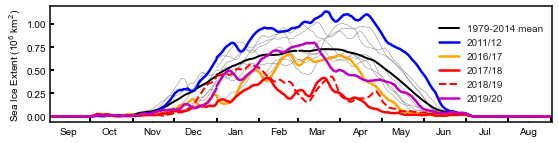

In [11]:
### 2009+

# start at Sep 1 (244)
# Area Extent in x10^6 km^2

fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for yy in range(2009,2018,1):
    plt.plot(dfe.index,dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    plt.plot(dfe['doy_y2'],dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    
#Fall
l1 = ax1.plot(dfmean.index,dfmean['avg']/1e6,'k',linewidth=2,label='1979-2014 mean')
l5 = ax1.plot(dfe.index,dfe[2011]/1e6,'b-',linewidth=2.5,label='2011/12')
l6 = ax1.plot(dfe.index,dfe[2016]/1e6,'orange',linewidth=2.5,label='2016/17')
l7 = ax1.plot(dfe.index,dfe[2017]/1e6,'r-',linewidth=2.5,label='2017/18')
l8 = ax1.plot(dfe.index,dfe[2018]/1e6,'r--',linewidth=2.,label='2018/19')
l9 = ax1.plot(dfe.index,dfe[2019]/1e6,'m-',linewidth=2.5,label='2019/20')
#Spring
plt.plot(dfmean['doy_y2'],dfmean['avg']/1e6,'k',linewidth=2,label='')
plt.plot(dfe['doy_y2'],dfe[2012]/1e6,'b-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2017]/1e6,'orange',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2018]/1e6,'r-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2019]/1e6,'r--',linewidth=2.,label='')
plt.plot(dfe['doy_y2'],dfe[2020]/1e6,'m-',linewidth=2.5,label='')

plt.legend(loc='right')
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336,
               0+365,31+365,61+365,92+365,122+365,153+365,
               183+365,214+365,245+365,275+365,306+365,336+365),)
ax1.set_xlim([244,244+365])
#plt.yticks(np.arange(0,1.2,.4))
ax1.tick_params(axis='y',which='both',bottom='on')

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax1.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(DateFormatter('%b'))
ax1.xaxis.set_major_formatter(DateFormatter(''))
ax1.xaxis.set_tick_params(which='major', pad=15)
ax1.xaxis.set_tick_params(which='minor', pad=5)
    
plt.ylabel('Sea Ice Extent (10$^{6}$ km$^{2}$)')
fig.savefig('images/EBS_fig3.png',dpi=300)
fig.savefig('images/EBS_fig3.svg',dpi=300)

### March 15th amount vs annual max

Text(0, 0.5, 'Sea Ice Extent (10$^{6}$ km$^{2}$)')

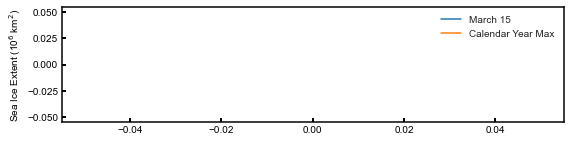

In [12]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
plt.plot(dfe.iloc[74][47:-1]/1e6,label='March 15')
plt.plot(dfe.max()[47:-1]/1e6,label='Calendar Year Max')

plt.legend()
plt.ylabel('Sea Ice Extent (10$^{6}$ km$^{2}$)')

## ALL BS (resets rest of routine)

In [13]:
### All BS
fid = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/N_Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx'
page = 'Bering-Extent-km^2' #Bering-Area-km^2

dfe = pd.read_excel(fid,sheet_name=page)

dfe = dfe.interpolate()
dfe['doy_y2'] = dfe.index+365

dfmean = dfe.copy()
dfmean.drop(columns=[2018,2017,2016,2015],inplace=True)
dfmean['avg'] = dfmean.drop(59,axis=0).drop(['month','day'], axis=1).mean(axis=1)
#previous line has lots of columns that don't need to be part of the mean
## unnamed (second doy) brings value down alot, but it also had the daily averages in it
# so that should have brought it back up

drop_cols = ['month', 'day','doy_y2']
dfmean['avg'] = dfmean.drop(59,axis=0).drop(drop_cols, axis=1).mean(axis=1)

#make missing days after present day
dfe[2021][dfe[2021].index > int(datetime.datetime.strftime(datetime.datetime.now(),'%j'))] = np.nan


<ipython-input-13-b7335a65d677>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe[2020][dfe[2020].index > int(datetime.datetime.strftime(datetime.datetime.now(),'%j'))] = np.nan


In [14]:
dfe

,month,day,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,doy_y2
0,January,1,NaN,352466.773,535414.788,607153.703,392430.646,442389.214,241988.064,359855.028,...,614095.869,373375.477,239643.667,451155.294,219911.554,151719.646,434922.701,328531.786,258874.430,365
1,NaN,2,NaN,333566.581,521478.773,618147.956,396209.946,450169.306,287573.667,362366.608,...,625197.958,382626.481,230843.978,449373.403,187223.086,163918.704,442476.700,351061.222,255369.098,366
2,NaN,3,NaN,303788.545,531864.093,624965.711,400400.563,473135.239,334928.486,376908.913,...,638579.861,388240.574,219913.248,446140.421,161694.321,176005.376,446522.940,378174.651,259191.479,367
3,NaN,4,NaN,282262.244,531065.110,632150.001,417356.961,492178.864,366019.941,367856.501,...,650655.001,405033.039,206940.171,442886.268,151764.598,181062.718,444424.013,401659.691,268327.155,368
4,NaN,5,NaN,267487.919,543541.594,625882.306,427519.152,516430.360,403473.863,358570.723,...,655610.052,413132.643,192044.035,441614.702,144559.214,184203.094,453935.058,426671.207,277813.392,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,NaN,27,363737.506,498949.698,520687.159,409070.836,428644.702,139213.014,306430.151,288442.799,...,305627.207,295126.691,427617.950,201876.607,113049.076,366426.334,198921.298,NaN,126373.507,726
362,NaN,28,378058.452,520395.405,542179.838,417362.938,428039.478,127841.752,315098.717,253352.390,...,324490.253,294228.479,445764.353,227681.294,112449.291,372029.280,225982.746,NaN,126373.507,727
363,NaN,29,383079.852,536032.336,553625.582,407518.196,437024.018,149515.845,321159.811,235614.716,...,341475.599,286618.757,455606.374,237632.479,114767.666,389662.314,253058.225,NaN,126373.507,728
364,NaN,30,393072.845,535175.577,572616.098,394431.151,436365.341,162809.398,329037.496,232310.077,...,352700.022,273584.188,456526.972,234583.628,123631.027,411382.537,281546.519,NaN,126373.507,729


## Plot using Altair

In [15]:
import altair as alt
from altair.expr import datum

In [21]:
dfe = pd.read_excel(fid,sheet_name=page)

In [22]:
dfe.reset_index(level=0, inplace=True)

In [23]:
df = dfe.drop(['month','day'],axis=1).melt('index', var_name='year', value_name='ice_conc').dropna()
df = df[df.year!=1978]
df['DateTime']= df.apply(lambda row: pd.datetime.strptime(str(row['year'])+' '+str(row['index']+1),'%Y %j'), axis=1)


<ipython-input-23-2956e0f114e9>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['DateTime']= df.apply(lambda row: pd.datetime.strptime(str(row['year'])+' '+str(row['index']+1),'%Y %j'), axis=1)


In [24]:
df

,index,year,ice_conc,DateTime
366,0,1979,352466.773,1979-01-01
367,1,1979,333566.581,1979-01-02
368,2,1979,303788.545,1979-01-03
369,3,1979,282262.244,1979-01-04
370,4,1979,267487.919,1979-01-05
...,...,...,...,...
15885,147,2021,200127.662,2021-05-28
15886,148,2021,178763.914,2021-05-29
15887,149,2021,154558.996,2021-05-30
15888,150,2021,140162.628,2021-05-31


In [25]:
datestamp = df.DateTime.max()

In [26]:
## some basic housekeeping... 
# a limitiation of altair / javascript
alt.data_transformers.disable_max_rows()

#  Load 508 compliant NOAA colors
OceansBlue1='#0093D0'
OceansBlue2='#0055A4' # rebecca dark blue
CoralRed1='#FF4438'
SeagrassGreen1='#93D500'
SeagrassGreen4='#D0D0D0' # This is just grey
UrchinPurple1='#7F7FFF'
WavesTeal1='#1ECAD3'

In [71]:
selector = alt.selection_single(
    fields=['year'], 
    empty='all',
    bind='legend'
)


pastyearscolor=['#D0D0D0']*38
pastyears= [(x) for x in range(1979,2017,1)]
scale = alt.Scale(domain=pastyears + [2017,2018,2019,2020,2021],
                  range=pastyearscolor+['#9acd32','#668B8B','#79CDCD','#0EBFE9', '#0055A4'])


In [72]:
#base chart setup below
current = alt.Chart(df
).mark_line(
    color='grey',
    clip=True
).encode(
    alt.X('monthdate(DateTime):T',title='',axis=alt.Axis(format='%b')),
    alt.Y('ice_conc:Q',title='Ice Concentration'),
    alt.Color('year:N',scale=scale, legend=alt.Legend(columns=4,symbolLimit=43)),
    opacity=alt.condition(selector, alt.value(1), alt.value(0))
).add_selection(
    selector
).properties(
    width=850,
    height=400
)

mean = alt.Chart(df
).mark_line(
    color='black',
    clip=True
).encode(
    alt.X('monthdate(DateTime):T'),
    alt.Y('mean(ice_conc):Q'),
).transform_filter(
    alt.FieldLTEPredicate('year', 2015)
)

base_chart = (current+mean)

# chart factory
def make_chart(base_chart, region, options):
    title = f'{region}'
    chart = base_chart\
      .properties(title=title)
    return chart

In [73]:
options = {'width': 150, 'height': 150}
allcharts = make_chart(base_chart, 'BS', options)

allcharts_final = allcharts.properties(
    background='#f4f4f4',
    title=f"BS Ice Extent {datestamp.strftime('%b %d %Y')}"
).configure(
# fix that pesky title
    title=alt.TitleConfig(fontSize=14, anchor='middle', offset=10),
    legend=alt.LegendConfig(labelFontSize=12, titleFontSize=12, symbolSize=100, offset=25)
)

allcharts_final

alt.LayerChart(...)

In [46]:
allcharts_final.save('/Users/bell/Sites/shaunwbell.github.io/files/BS_IceExtent_current.html')

## exporting of data files to csv files as long doy indexed files

In [ ]:
#and for NH extent
fid = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Daily_Extent_G02135_v3.0.xlsx'
page = 'NH-Daily-Extent' #Bering-Area-km^2

dfe = pd.read_excel(fid,sheet_name=page)
dfe.reset_index(level=0, inplace=True)
df = dfe.drop(['Unnamed: 0','Unnamed: 1','1981-2010'],axis=1).melt('index', var_name='year', value_name='ice_conc').dropna()
df = df[df.year!=1978]
df['DateTime']= df.apply(lambda row: pd.datetime.strptime(str(row['year'])+' '+str(row['index']+1),'%Y %j'), axis=1)
df['index'] = df['index']+1
df.to_csv('N_Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0_doy.csv')